In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\aditya\Desktop\Pregrad\Pregrad_august\Dataset\Algerian_forest_fires_cleaned_dataset.csv")
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [5]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [6]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
data['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

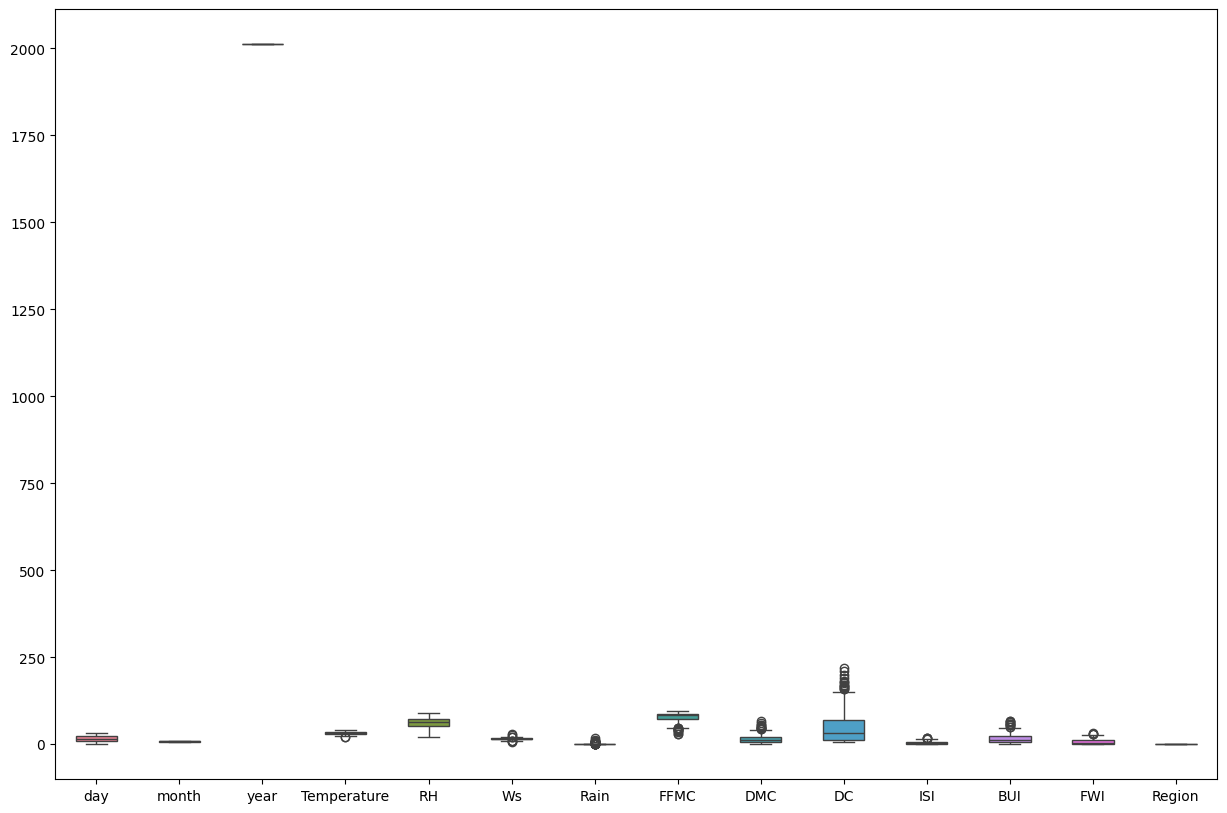

In [8]:
# Assuming 'data' is a DataFrame
fig, ax = plt.subplots(figsize=(15, 10))

# Correcting the code by removing 'fillersize' and adjusting valid parameters
sns.boxplot(data=data, width=0.5, ax=ax)

plt.show()

In [9]:
data['Classes'] = np.where(data['Classes'].str.contains("not fire"),0,1)

In [10]:
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
data.drop(['day', 'month', 'year', 'Region'], axis=1, inplace=True)

In [12]:
data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [13]:
X = data.drop('Classes', axis = 1)
y = data['Classes']

In [36]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [37]:
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int32

In [38]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
238    1
239    0
240    0
241    0
242    0
Name: Classes, Length: 243, dtype: int32

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7
207,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3
158,38,43,13,0.5,85.0,13.0,35.4,4.1,13.7,5.2
132,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7
84,34,64,14,0.0,88.9,40.5,171.3,9.0,50.9,20.9


In [41]:
X_train.shape, X_test.shape

((194, 10), (49, 10))

In [42]:
y_train.shape, y_test.shape

((194,), (49,))

<Axes: >

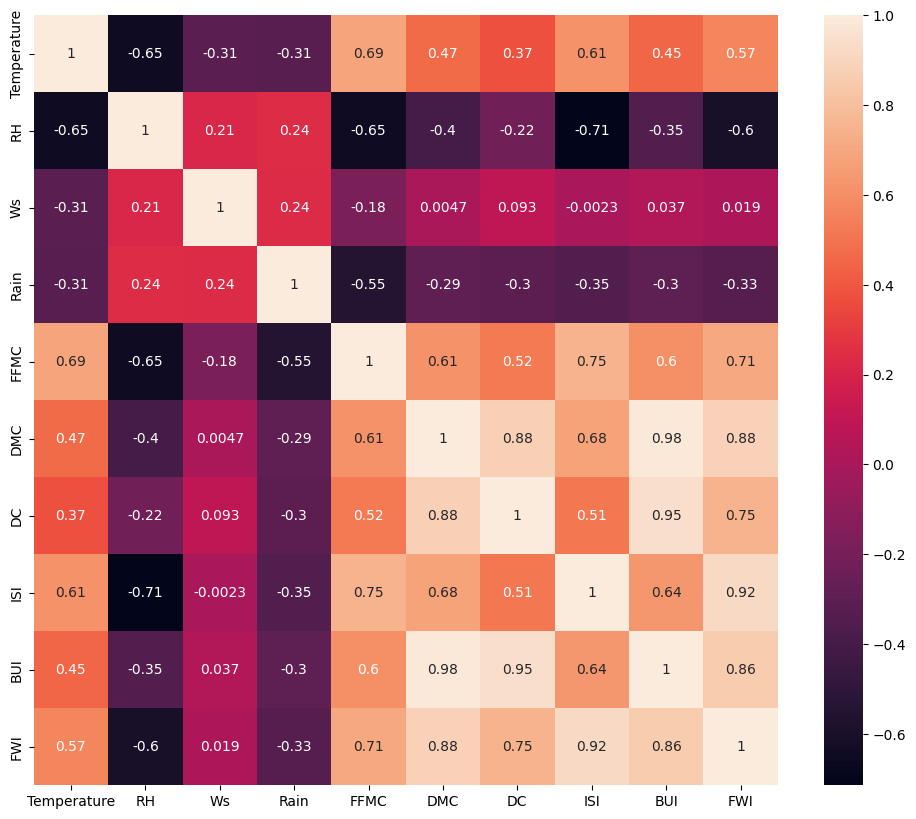

In [21]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [22]:
from sklearn.preprocessing import MinMaxScaler
import pickle
from pathlib import Path
## Min Max Scaling
def minmax_scaler(X_train, X_test):
    #Scaling the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ## Saving the model
    file = open(r"C:\Users\aditya\Desktop\Pregrad\Pregrad_august\Model\MinMaxScaler.pkl", 'wb')
    pickle.dump(scaler, file)
    file.close()

    return X_train_scaled, X_test_scaled

In [23]:
X_train_scaled, X_test_scaled = minmax_scaler(X_train, X_test)

### Boxplots to understand effect of Standard Scaler

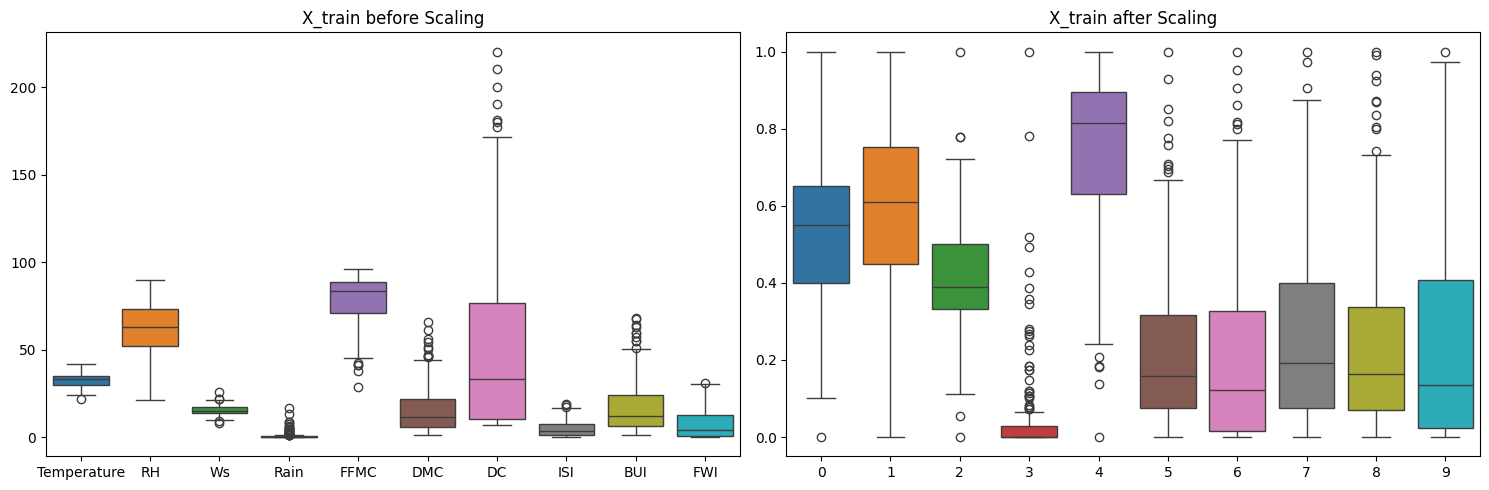

In [24]:
plt.figure(figsize=(15, 5))  # Set the figure size

# First subplot: Before Scaling
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
sns.boxplot(data=X_train)
plt.title("X_train before Scaling")

# Second subplot: After Scaling
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sns.boxplot(data=X_train_scaled)
plt.title("X_train after Scaling")

# Show the plots
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [25]:
X_train_scaled

array([[0.35      , 0.63768116, 0.61111111, ..., 0.07894737, 0.06606607,
        0.02250804],
       [0.55      , 0.23188406, 0.44444444, ..., 0.68947368, 0.93993994,
        0.97427653],
       [0.8       , 0.31884058, 0.27777778, ..., 0.21578947, 0.18468468,
        0.16720257],
       ...,
       [0.15      , 0.79710145, 0.5       , ..., 0.01052632, 0.00600601,
        0.00321543],
       [0.6       , 0.55072464, 0.44444444, ..., 0.38947368, 0.27177177,
        0.35048232],
       [0.4       , 0.8115942 , 0.72222222, ..., 0.05789474, 0.01501502,
        0.0096463 ]])

In [26]:
X_test_scaled

array([[ 4.50000000e-01,  6.23188406e-01,  3.88888889e-01,
         0.00000000e+00,  8.62017804e-01,  2.04615385e-01,
         2.66510539e-01,  3.00000000e-01,  2.53753754e-01,
         2.70096463e-01],
       [ 5.50000000e-01,  4.78260870e-01,  2.77777778e-01,
         0.00000000e+00,  8.84272997e-01,  1.38461538e-01,
         1.10538642e-01,  3.36842105e-01,  1.42642643e-01,
         2.31511254e-01],
       [ 3.00000000e-01,  5.36231884e-01,  5.55555556e-01,
         1.30952381e-01,  5.20771513e-01,  3.53846154e-02,
         7.49414520e-03,  6.31578947e-02,  2.85285285e-02,
         1.60771704e-02],
       [ 6.00000000e-01,  5.36231884e-01,  2.77777778e-01,
         1.19047619e-02,  7.55192878e-01,  2.73846154e-01,
         3.79859485e-01,  1.10526316e-01,  3.45345345e-01,
         1.22186495e-01],
       [ 4.00000000e-01,  6.37681159e-01,  3.33333333e-01,
         0.00000000e+00,  8.42729970e-01,  2.32307692e-01,
         1.76112412e-01,  2.36842105e-01,  2.32732733e-01,
         2.

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
y_predict = log_reg.predict(X_test_scaled)

In [29]:
y_predict

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1])

In [30]:
y_test.values

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1])

### Confusion matrix, Accuracy score, Classification report

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [32]:
print(confusion_matrix(y_predict, y_test))
print(accuracy_score(y_predict, y_test))
print(classification_report(y_predict,y_test))

[[20  2]
 [ 2 25]]
0.9183673469387755
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.93      0.93      0.93        27

    accuracy                           0.92        49
   macro avg       0.92      0.92      0.92        49
weighted avg       0.92      0.92      0.92        49



In [33]:
cm = confusion_matrix(y_predict,y_test)

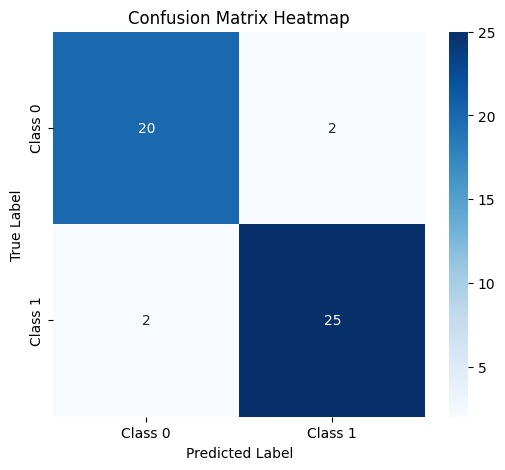

In [34]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [35]:
import pickle
file = open(r"C:\Users\aditya\Desktop\Pregrad\Pregrad_august\Model\Classification.pkl", 'wb')
pickle.dump(log_reg, file)
file.close()